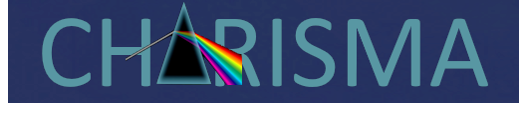

# CHARISMA: Reading HSDS datasets

In [1]:
from ramanchada.classes import RamanChada, SpectrumGroup
import os,path
import pandas as pd
import numpy as np

In [6]:
import h5pyd, h5py
import h5pyd._apps.hsinfo as hsinfo
print(hsinfo.cfg["hs_endpoint"])

https://hsds.ideaconsult.net


In [ ]:
from ramanchada.file_io.io import read_chada

RamanChada with 3808 points generated Wed Dec  8 13:41:49 2021
Raman shift [1/cm]: 175.0 - 3982.0
raw counts [1]: -24.84761619567871 - 1456.7978515625


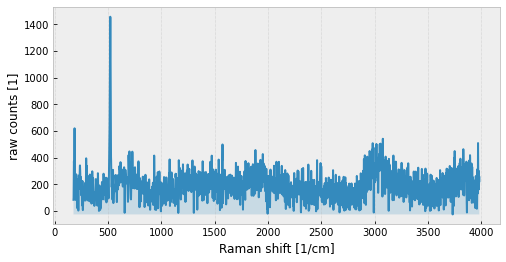

In [16]:
#error if raw=False and there is no dataset different than raw, 
R = RamanChada("/Round_Robin_1/FNMT-Madrid/BWTEK_iRaman/532/Probe/S0P10_iR532_Probe_005_60000msx2.cha",raw=True,is_h5pyd=True)
print(R)
R.plot()

## First, let's do all steps by hand

### Determine the Silicon measured 520.45 cm-1 peak positions for a given laser power

Load Si SOP file

In [18]:
file = "/Round_Robin_1/FNMT-Madrid/BWTEK_iRaman/532/Probe/S0P10_iR532_Probe_005_60000msx2.cha"

In [20]:
SOP = RamanChada(file,raw=True,is_h5pyd=True)

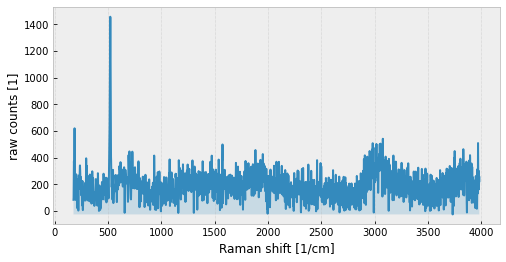

In [21]:
SOP.plot()

Crop to ROI

In [22]:
SOP.x_crop(200,1200)

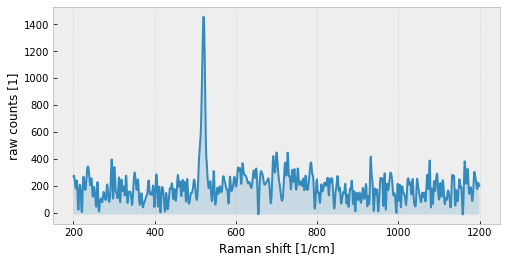

In [23]:
SOP.plot()

In [24]:
SOP.normalize('minmax')

Fit main peak: Voigt model in interval of 2x FWHM

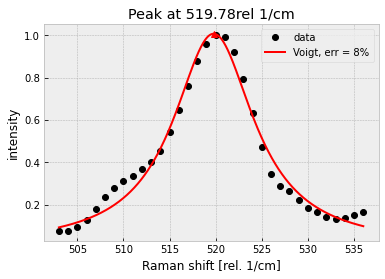

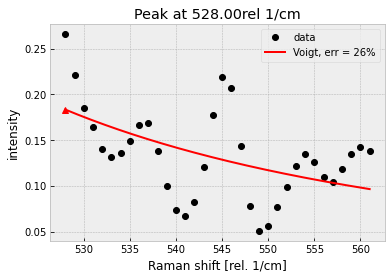

In [25]:
SOP.peaks(fitmethod='voigt', x_min=400, x_max=600, show=True, interval_width=2)

In [26]:
SOP.bands

,position,intensity,prominence,FWHM,Gauss area,voigt fitted position,voigt fitted FWHM,voigt fitted area
0,520.0,1.000000,0.973329,10.297919,10.961889,519.780781,16.397802,16.904413
1,458.0,0.186989,0.122670,20.378292,21.692204,NaN,NaN,NaN
2,570.0,0.186942,0.107280,10.728978,11.420740,NaN,NaN,NaN
3,405.0,0.193643,0.096141,5.528890,5.885372,NaN,NaN,NaN
4,497.0,0.176268,0.095280,7.716100,8.213604,NaN,NaN,NaN
5,545.0,0.219535,0.087977,4.646528,4.946118,528.000000,97.664844,130.782084
6,419.0,0.138251,0.079964,4.382279,4.664831,NaN,NaN,NaN
7,440.0,0.132822,0.063099,6.777599,7.214592,NaN,NaN,NaN


Calculate constant x shift from Si peak position

In [27]:
sop_shift = 520.45 - SOP.bands['voigt fitted position'][0]
sop_shift

0.6692192192192579

#### The same steps are performed for all Si types

In [28]:
file = "/Round_Robin_1/FNMT-Madrid/BWTEK_iRaman/532/Probe/S1N10_iR532_Probe_005_25000msx2.cha"


In [30]:
S1N = RamanChada(file,raw=True,is_h5pyd=True)

In [32]:
S1N.x_crop(200,1200)

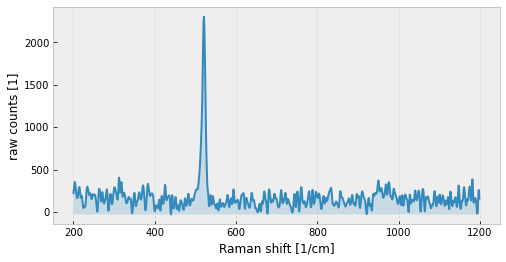

In [33]:
S1N.plot()

In [34]:
S1N.normalize('minmax')

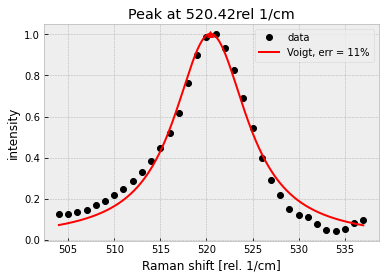

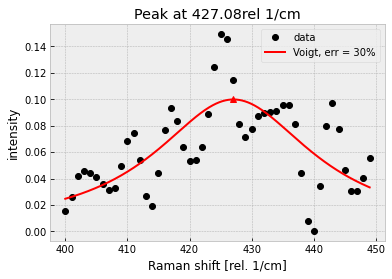

In [35]:
S1N.peaks(fitmethod='voigt', x_min=400, x_max=600, show=True, interval_width=2)

In [36]:
S1N.bands

,position,intensity,prominence,FWHM,Gauss area,voigt fitted position,voigt fitted FWHM,voigt fitted area
0,521.0,1.000000,0.989877,9.986274,10.630150,520.417417,13.923023,14.628883
1,425.0,0.149543,0.103072,14.429067,15.359397,427.075075,47.636420,4.867750


In [37]:
s1n_shift = 520.45 - S1N.bands['voigt fitted position'][0]
s1n_shift

0.03258258258267688

In [ ]:
file = "/Round_Robin_1/FNMT-Madrid/BWTEK_iRaman/532/Probe/S0B10_iR532_Probe_005_60000msx2.cha"


In [38]:
SOB = RamanChada(file,is_h5pyd=True,raw=True)

In [40]:
SOB.x_crop(200,1200)

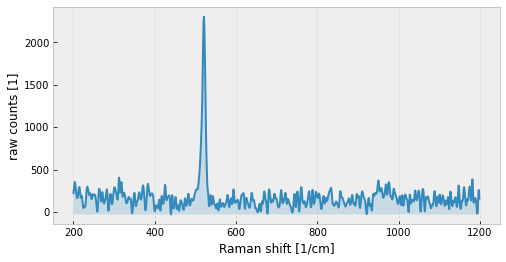

In [41]:
SOB.plot()

In [42]:
SOB.normalize('minmax')

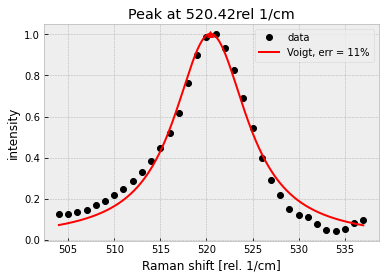

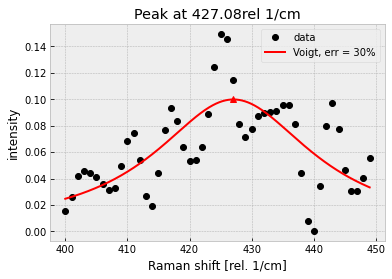

In [43]:
SOB.peaks(fitmethod='voigt', x_min=400, x_max=600, show=True, interval_width=2)

In [44]:
SOB.bands

,position,intensity,prominence,FWHM,Gauss area,voigt fitted position,voigt fitted FWHM,voigt fitted area
0,521.0,1.000000,0.989877,9.986274,10.630150,520.417417,13.923023,14.628883
1,425.0,0.149543,0.103072,14.429067,15.359397,427.075075,47.636420,4.867750


In [45]:
sob_shift = 520.45 - SOB.bands['voigt fitted position'][0]
sob_shift

0.03258258258267688

SOB and SOP position are oddly identical. Check if spectra are identical:

In [47]:
G = SpectrumGroup([SOB, SOP])

TypeError: cannot pickle 'module' object

In [ ]:
%matplotlib notebook

In [ ]:
G.plot()

#### Now, we can make a nice table for the current laser power

In [ ]:
Si = pd.DataFrame({'SOB': SOB.bands['voigt fitted position'][0],
                  'S1N': S1N.bands['voigt fitted position'][0],
                  'SOP': SOP.bands['voigt fitted position'][0]},
                  index=['Silicon measured 520.45 cm-1 peak position'])

In [ ]:
Si

### Determine Polystyrene peak positions  for a given laser power

In [ ]:
filename = "27 polystyrene.spc"
file = os.path.join(folder,file)

In [ ]:
PS = RamanChada(file)

In [ ]:
PS.plot()

In [ ]:
PS.x_crop(250,3200)

In [ ]:
PS.normalize('minmax')

In [ ]:
PS.plot()

In [ ]:
PS.peaks(fitmethod='vg', show=True, interval_width=1.5, sort_by='position')

In [ ]:
PS.bands

Define reference peak positions for PS and sort (descending)

In [ ]:
ps_peak_pos = [221,
407,
543,
620.9,
795.8,
1001.4,
1031.8,
1155.3,
1450.5,
1583.1,
1602.3,
2852.4,
2904.5,
3054.3]

In [ ]:
ps_peak_pos.sort(reverse=True)

In [ ]:
PS.bands['PS position'] = np.nan

Assign each peak found in the spectrum to the nearest reference peak.

In [ ]:
for pos in ps_peak_pos:
    index = np.argmin(np.abs(PS.bands['position']-pos))
    PS.bands['PS position'][index] = pos

In [ ]:
PS.bands

Put everything together in new DataFrame

In [ ]:
import pandas as pd

In [ ]:
RR = pd.DataFrame()
RR['Polystyrene peak positions'] = PS.bands['PS position']
RR['Measured positions'] = PS.bands['vg fitted position']
RR['Deviation'] = RR['Measured positions'] - RR['Polystyrene peak positions']

Add Si-adjusted deviations

In [ ]:
RR['Deviation after S0B adjustment'] = RR['Deviation'] + sob_shift
RR['Deviation after S1N adjustment'] = RR['Deviation'] + s1n_shift
RR['Deviation after S0P adjustment'] = RR['Deviation'] + sop_shift

In [ ]:
RR

---

## Now, let's put together a script

In [ ]:
from tkinter.filedialog import askopenfilenames

In [ ]:
laser_powers = [5, 25, 50, 75, 100]
silicons = ['SOB', 'S1N', 'S0P']

Here, the user chooses first the PS and then the Si files. There are several Si types per power level.

In [ ]:

ps_files = askopenfilenames()

In [ ]:
si_files = askopenfilenames()

In [ ]:
ps_files

In [ ]:
si_files

In the script, I use `labels_from_filenames`. This is a handy tool that extract, well, labels from filenames:

In [ ]:
from ramanchada.utilities import labels_from_filenames

In [ ]:
ps_basenames = [ os.path.basename(s) for s in ps_files ]
ps_basenames

E.g. get the 2nd non-numeric block from each name (= instrument):

In [ ]:
#this relies on proper file names ...
labels_from_filenames(ps_basenames, numeric=False, pos=1)

Or the 3rd-last numeric block (= laser power):

In [ ]:
labels_from_filenames(ps_basenames, numeric=True, pos=-3)

Or else the 1st number before "ms" (=integration time):

In [ ]:
labels_from_filenames(ps_basenames, pivot_string='ms', numeric=True, pos=-1)

Now, we can write the script that produces tables for all laser powers.

The resulting tables can be saved as Excel etc.

In [ ]:
from IPython.display import display

In [ ]:
# Extract basenames & power values from filenames
si_basenames = [ os.path.basename(s) for s in si_files ]
ps_basenames = [ os.path.basename(s) for s in ps_files ]
powers_si = labels_from_filenames(si_basenames, pos=-3)
powers_ps = labels_from_filenames(ps_basenames, pos=-3)
# Iterate over all laser powers
for power in laser_powers:
    # First, load Si files for current power & determine Si shifts
    right_files = [ f for indx,f in enumerate(si_files) if powers_si[indx] == power ]
    # Iterate Si types
    for si in silicons:
        # Only one file with current power has the current type string
        current_si_file = [ r for r in right_files if si in r ][0]
        print(f'Determining Si position for power {power}% and type {si} on file {os.path.basename(current_si_file)}')
        # Load the data, pre-process, determine peaks & shifts
        S = RamanChada(current_si_file)
        S.x_crop(200,1200)
        S.normalize('minmax')
        S.peaks(fitmethod='voigt', x_min=400, x_max=600, show=False, interval_width=2)
        si_shifts.update({si: 520.45 - S.bands['voigt fitted position'][0]})
    print(f'Shifts for Laser power {power} % [1/cm]: {si_shifts}')

    # now load Polystyrene file. There's only one file with current power.
    right_file = [ f for indx,f in enumerate(ps_files) if powers_ps[indx] == power ][0]
    PS = RamanChada(right_file)
    print(f'Fitting peaks on file {os.path.basename(right_file)}')
    PS.x_crop(250,3200)
    PS.normalize('minmax')
    PS.peaks(fitmethod='vg', show=False, interval_width=1.5, sort_by='position')
    PS.bands['PS position'] = np.nan
    for pos in ps_peak_pos:
        index = np.argmin(np.abs(PS.bands['position']-pos))
        PS.bands['PS position'][index] = pos
    RR = pd.DataFrame()
    RR['Polystyrene peak positions'] = PS.bands['PS position']
    RR['Measured positions'] = PS.bands['vg fitted position']
    RR['Deviation'] = RR['Measured positions'] - RR['Polystyrene peak positions']
    for si in silicons:
        RR[f'Deviation after {si} adjustment'] = RR['Deviation'] + si_shifts[si]
    print(f'Values for Laser power {power} % [1/cm]')
    display(RR)